##Python'da Dereceli Azaltma Metodunun Uygulanması
Gradyan iniş, makine öğreniminde çoğunlukla bir kayıp fonksiyonunu en aza indirmek için kullanılan bir optimizasyon algoritmasıdır.

Bu not defterinde python kullanarak sıfırdan basit bir gradyan iniş algoritması uygulayacağız

Bu gradyan iniş algoritması, oluşturacağımız belirli bir fonksiyonda minimum bir değer bulmamıza yardımcı olacaktır.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Bu fonksiyonun gradyan inişini bulacağız - $ f(x) = x^3-3x^2+7$

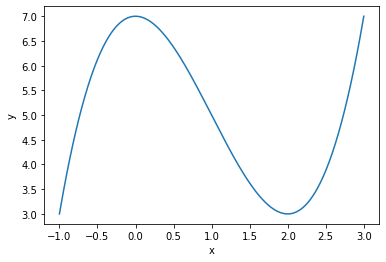

In [ ]:

#creating the function and plotting it 

function = lambda x: (x ** 3)-(3 *(x ** 2))+7

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-1,3,300)

#Plot the curve
plt.plot(x, function(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Minimum değerimizin 2.0 civarında olması gerektiğini görmekteyiz.

Kesin değeri bulmak için gradyan inişini kullanalım

Yardımcı fonksiyonlarımızı yazmaya devam edeceğiz:

x'in türevini hesaplayan bir fonksiyon Gerçek gradyan inişini adım adım gerçekleştiren bir fonksiyon

In [ ]:
def deriv(x):    
    x_deriv = 3* (x**2) - (6 * (x))
    return x_deriv

In [ ]:
def step(x_new, x_prev, precision, l_r):
    
    '''
    Bu işlev, x için bir başlangıç veya önceki değeri alır, öğrenme hızı yoluyla atılan adımlara göre günceller ve   minimum x değerini verir..
    Argümanlar:    
    x_new - öğrenme oranına göre güncellenecek bir x başlangıç değeri    
    x_prev -yenisiyle güncellenen önceki x değeri    
    precision - kademeli inişin durmasını belirleyen bir kesinlik    
    l_r - öğrenme oranı (her iniş adımının boyutu)    
    '''
    # her yineleme sırasında güncellenmiş x ve y değerlerinin değiştirileceği boş listeler oluşturma    
    x_list, y_list = [x_new], [function(x_new)]
    # istediğiniz eşik değere kadar döngüye devam edin
    while abs(x_new - x_prev) > precision:        
        # cx in değerini değiştir
        x_prev = x_new
                
        # x in eski değerinin türevini al
        d_x =  deriv(x_prev)
        
        # öncekini, türevin çarpımını ve öğrenme oranını ekleyerek yeni x değerinizi elde edin
        x_new = x_prev - (l_r * d_x)
        
        # sonucun daha sonra görselleştirilmesi için x'in yeni değerini tüm x'lerin listesine ekleyin
        x_list.append(x_new)
        
        # sonucun daha sonra görselleştirilmesi için tüm y'lerin listesine y'nin yeni değerini ekleyin
        y_list.append(function(x_new))

    print ("Lokal mininmum noktası: "+ str(x_new))
    print ("Adım sayısı: " + str(len(x_list)))
    
    
    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Dereceli Azaltma ")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.xlim([1.8,2.5])
    plt.title("Anahtar nokta kısmında büyütülmüş alan")
    plt.show()

Lokal mininmum noktası: 1.9999951402776417
Adım sayısı: 9


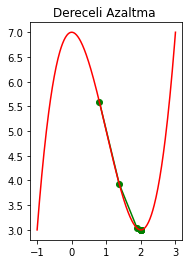

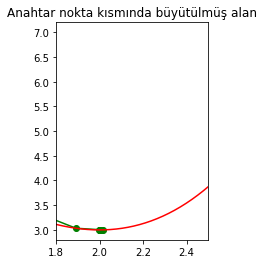

In [ ]:
step(0.8, 0, 0.0001, 0.2)